In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

%matplotlib inline

In [2]:
def calculate_law(y):
    games = pd.read_csv('processed/pbp-summary-{}.csv'.format(y), dtype={'GAME_ID':str})
    winners = pd.read_csv('processed/winners-{}.csv'.format(y), dtype={'GAME_ID':str})
    together = pd.merge(games, winners).sort_values(['GAME_ID','EVENTNUM'])
    law = together.groupby('GAME_ID').apply(lambda x: x[x.POINTS >= 100].head(1))
    total_games = len(winners)
    law_invoked = len(law)
    law_correct = (law.SIDE == law.WINNER).sum()
    return pd.Series([y,total_games,law_invoked,law_correct], index=['year','total_games','law_invoked','law_correct'])

In [3]:
final = pd.concat([calculate_law(y) for y in tqdm(range(1997, 2020))], axis=1)\
.transpose()\
.set_index('year')

100%|██████████| 23/23 [01:04<00:00,  2.66s/it]


In [4]:
final['pct_games_invoked'] = final['law_invoked'] / final['total_games']
final['pct_law_correct'] = final['law_correct'] / final['law_invoked']

In [5]:
final

,total_games,law_invoked,law_correct,pct_games_invoked,pct_law_correct
year,,,,,
1997,1189,677,640,0.569386,0.945347
1998,1189,597,578,0.502103,0.968174
1999,725,266,256,0.366897,0.962406
2000,1189,723,698,0.608074,0.965422
2001,1189,585,561,0.492010,0.958974
2002,1189,602,578,0.506308,0.960133
2003,1189,580,544,0.487805,0.937931
2004,1189,493,470,0.414634,0.953347
2005,1230,706,660,0.573984,0.934844


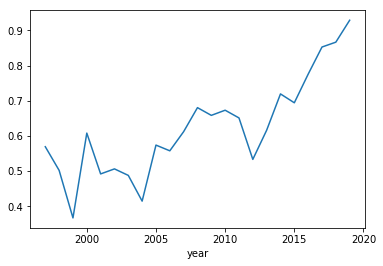

In [6]:
final.pct_games_invoked.plot()

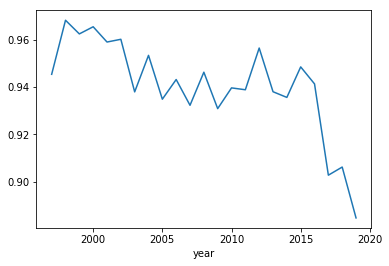

In [7]:
final.pct_law_correct.plot()

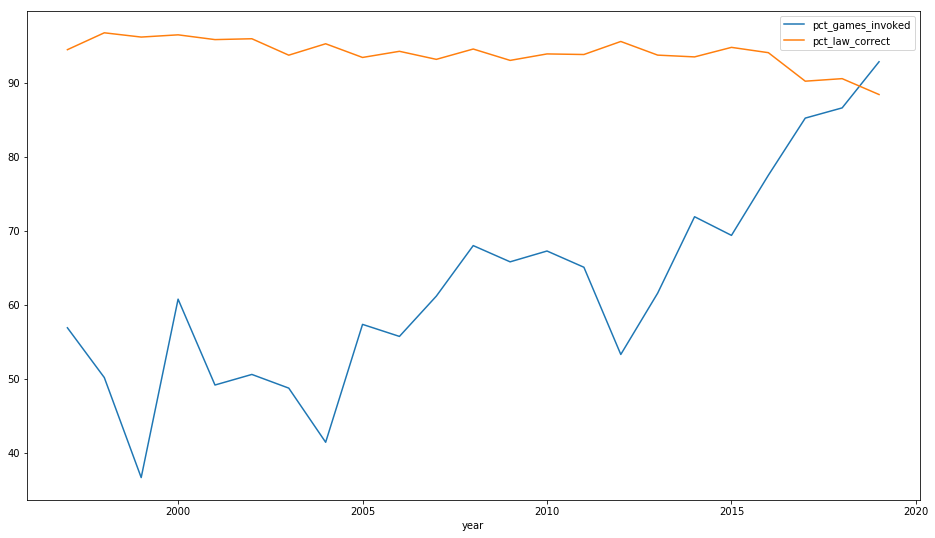

In [21]:
(final[['pct_games_invoked','pct_law_correct']] * 100).plot(figsize=(16,9))

In [8]:
final.to_csv('law-by-year.csv')